In [211]:
%matplotlib inline
import pandas as pd
import twitter as tw
import geopandas as gpd
import pyproj
import math
import numpy as np
import matplotlib.pyplot as plt

In [241]:
df_mars = gpd.read_file("Scripts/export-6.geojson")
df_lyon = gpd.read_file("Scripts/vélo-lyonok.geojson")
df_stras = gpd.read_file("Scripts/vélo-stras-ok.geojson")
df_rennes = gpd.read_file("Scripts/vélo-Rennes-ok.geojson")
df_barc = gpd.read_file("Scripts/vélo-barcelone-ok.geojson")


df_mars = df_mars.set_index("id")
df_lyon = df_lyon.set_index("id")
df_stras = df_stras.set_index("id")
df_rennes = df_rennes.set_index("id")
df_barc = df_barc.set_index("id")

Fonction de calcul des distances

In [229]:
wgs84 =  pyproj.Proj('+init=EPSG:4326')
lambert = pyproj.Proj('+init=EPSG:2154')
def distance(L):
    d = []
    dis = 0
    for i in range(0,len(L.xy[0])-1):
        X,Y = pyproj.transform(wgs84,lambert,L.xy[0][i],L.xy[1][i])
        d.append([X,Y])
    for i in range(0,len(d)-1):
        dis += math.sqrt((d[i+1][0]-d[i][0])**2+(d[i+1][1]-d[i][1])**2)/1000
    return dis

In [242]:
df_mars["distance"] = df.apply(lambda x : distance(x["geometry"]),axis=1)
df_lyon["distance"] = df_lyon.apply(lambda x : distance(x["geometry"]),axis=1)
df_stras["distance"] = df_stras.apply(lambda x : distance(x["geometry"]),axis=1)
df_rennes["distance"] = df_rennes.apply(lambda x : distance(x["geometry"]),axis=1)
df_barc["distance"]  = df_barc.apply(lambda x : distance(x["geometry"]),axis=1)

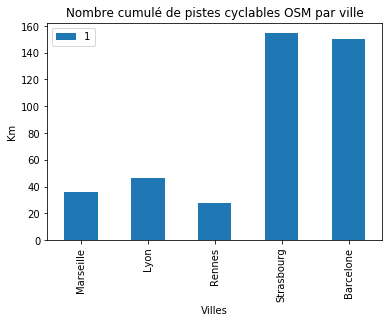

In [258]:
D = [["Marseille",df_mars["distance"].sum()],
 ["Lyon",df_lyon["distance"].sum()],
 ["Rennes",df_rennes["distance"].sum()],
 ["Strasbourg",df_stras["distance"].sum()],
 ["Barcelone",df_barc["distance"].sum()]]
pd.DataFrame(D).set_index(0).plot(kind="bar")
plt.title("Nombre cumulé de pistes cyclables OSM par ville")
plt.xlabel("Villes")
plt.ylabel("Km")

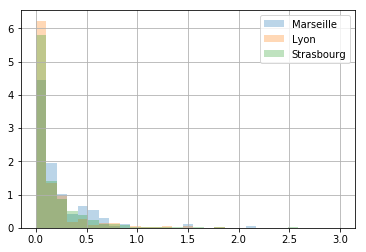

In [240]:
b = np.linspace(0,3,30)
ax = df["distance"].hist(alpha=0.3,bins=b, normed=True)
df_lyon["distance"].hist(ax=ax,alpha=0.3,bins=b, normed=True)
df_stras["distance"].hist(ax=ax,alpha=0.3,bins=b, normed=True)

plt.legend(["Marseille","Lyon","Strasbourg"])

In [219]:
df["highway"].value_counts()

cycleway    158
service       4
tertiary      1
Name: highway, dtype: int64

In [223]:
df.columns

Index(['@id', 'highway', 'source', 'alt_name', 'name', 'oneway', 'one',
       'bicycle', 'foot', 'segregated', 'level', 'surface', 'lit', 'layer',
       'incline', 'cycleway', 'maxspeed', 'ref', 'access', 'motor_vehicle',
       'tunnel', 'bicycle_road', 'vehicle', 'lanes', 'fixme', 'emergency',
       'bridge', 'psv', 'service', 'geometry', 'distance'],
      dtype='object')